In [5]:
import pandas as pd 
from sample import build_sample


training_set = pd.read_csv('training_set.csv', index_col=0)
training_set.tail(5)

,stock_name,date,_price_incr_1d,_price_incr_3d,_price_incr_7d,_price_incr_14d,_price_incr_28d,_price_incr_90d,price_incr_d1_,price_incr_d2_,...,801890,val_f_,log_volume_d1_,log_volume_d2_,log_volume_d3_,log_volume_d4_,log_volume_d5_,log_volume_d6_,log_volume_d7_,beta
38709,晶丰明源,20200817,-0.002628,-0.061806,-0.006189,0.052226,0.167953,0.337262,-0.012640,0.041409,...,NaN,NaN,12.784190,13.252168,13.504210,12.919312,13.533824,13.220423,13.308581,NaN
38710,致远互联,20200817,0.009515,-0.003309,0.086183,0.083701,0.117761,0.032129,0.006104,0.004319,...,NaN,NaN,12.532899,12.276764,13.188859,13.560549,13.330094,13.520022,13.351883,NaN
38711,嘉元科技,20200817,-0.008403,-0.018207,-0.123074,-0.124650,-0.133929,0.605567,0.001754,0.022047,...,0.0,1.043764,14.979035,14.904693,15.262128,14.908352,15.254748,15.851287,15.857768,0.431282
38712,普门科技,20200817,-0.010827,-0.047900,-0.077100,-0.068241,-0.076772,-0.294619,0.016339,0.006714,...,NaN,NaN,13.621929,13.775232,14.211957,14.497847,14.355484,14.950233,14.926758,NaN
38713,硕世生物,20200817,-0.000795,0.035721,-0.196517,-0.268920,-0.144839,-0.345461,0.045407,0.016643,...,NaN,NaN,14.120794,14.105747,14.360765,14.162981,14.092350,14.871024,14.800167,NaN


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from dataset import DataSet
from quant import *

%config InlineBackend.figure_formats = ['svg']
plt.figure(figsize=[8,5])

sns.set()    # old versions 
# sns.set_theme() # new versions 


df = training_set.copy()

feature_dt_list = [1,2,3,4,5,6,7]

for dt in feature_dt_list:
    df['ext_incr_d%i_' % dt] = df['price_incr_d%i_' % dt] -  df['index_incr_d%i_' % dt]  * df['beta'] 

df['_incr'] = df['_index_incr_7d'] * df['beta'] 
df['const_'] = 1
features = ['val_f_', '_incr', 'const_'] 
features += list(filter(lambda s: 'ext_incr' in s, df.columns))   


ds = DataSet(df)
ds = ds.fillna(0)
ds.split(0.2)
ds[features] = normalize(ds[features]) 
ds['const_'] = 1
param_df = ds.fit(label='_price_incr_7d', features=features, l2=1)

display(param_df.T)
ds.plot_rewards(['val_f_', 'pred_'], percentage=True, bucket_num=20)

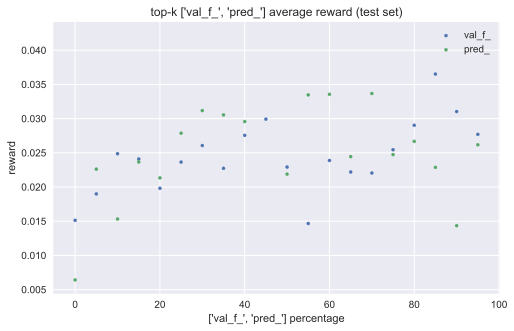

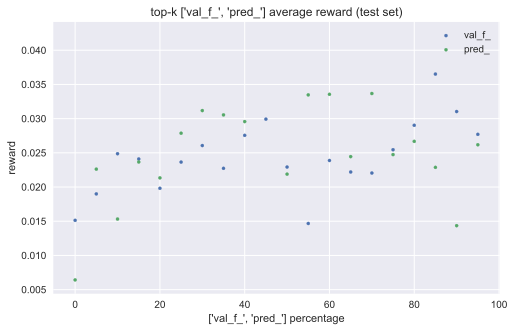

In [7]:
plt.show()